In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

Using TensorFlow backend.
D:\Conda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Conda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Conda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Conda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym o

In [2]:
df = pd.read_csv("desktop/youtube_dataset.csv")

In [3]:
df.head(10)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122
5,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzryH8U6Dz_yBmIgEZ4AaABAg,LR ICED WOLF,3.2 Million comments if you find mine your a l...,2020-03-15T21:11:08Z,370547
6,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzPg7VsuRTwJf77jch4AaABAg,lucas tehe12,claim your “here before 7 billion” tickets her...,2020-09-08T06:01:36Z,763
7,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugw61yKNdyVJ5T4R_sN4AaABAg,MemeDille,The ones who are NOT from Tik-Tok can like thi...,2020-09-08T08:44:47Z,94
8,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzhueoG3QOV4AbAYAt4AaABAg,Guty Castro soda,Song: spanish\nComments: English\nHotel: trivago,2020-09-09T01:17:50Z,150
9,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxaUPmMyW0KD8kqi4B4AaABAg,Taha'nın Mutfağı,Kimler burda😂🥰🌹,2020-09-08T07:28:39Z,45


In [4]:
df.describe(include="all")

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
count,19300,19300,19300,19299,19300,19300,19300.000000
unique,191,117,19121,15623,17573,19011,NaN
top,Shakira - La La La (Brazil 2014) ft. Carlinhos...,NickyJamTV,UgxXSdJ3i-S_uko7aw54AaABAg,Help me to reach 10k subs with 1 video,"My girlfriend said this song sucked, now she's...",2020-09-06T19:27:04Z,NaN
freq,200,500,2,108,34,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2142.412642
std,NaN,NaN,NaN,NaN,NaN,NaN,11795.954843
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,22.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,260.000000


D:\Conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


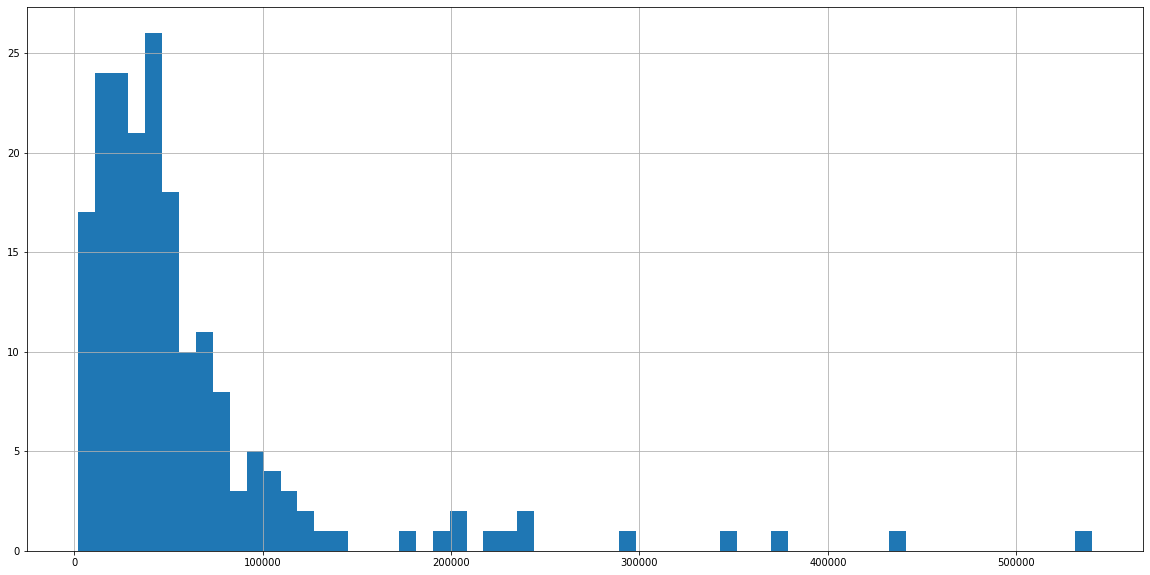

In [5]:
ds = df.groupby(['Channel Name','Video Name'])['Likes','Comment'].max().reset_index()
ds.columns = ['Channel Name','Video Name','Maximum Likes','Comment']

ds["Maximum Likes"].hist(bins=60,figsize=(20,10))

In [6]:
df.isnull().sum()

Video Name      0
Channel Name    0
Comment Id      0
User Name       1
Comment         0
Date            0
Likes           0
dtype: int64

In [7]:
X = df["Comment"]
Y = df["Likes"]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(14475,) (4825,) (14475,) (4825,)


In [9]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(np.array(Y_train).reshape(-1,1))
# Y_train = scaler.transform(np.array(Y_train).reshape(-1,1))
# Y_test = scaler.transform(np.array(Y_test).reshape(-1,1))

In [10]:
# filterList = ['\r','\t','\n','!','"','#','$','%','&','.',',','-','+','>','<','?','/','[',']']
# X_train = [x.translate('!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r') for x in X_train]

In [11]:
class YoutubePreprocessing:
  def __init__(self, X_train):
    #Make the tokenizer
    max_features = 20000
    self.tokenizer = Tokenizer(num_words=max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r„', lower=True, split=' ')
    self.tokenizer.fit_on_texts(list(X_train))

    self.vectorizer = CountVectorizer(min_df=0.0001)
    X_train = self.tokenize(X_train)
    self.vectorizer.fit(self.make_corpus(X_train))

  def tokenize(self, X):
    #Tokenize data (X_train or X_test)
    return self.tokenizer.texts_to_sequences(X)

  def make_corpus(self, X):
    return [' '.join([str(item) for item in [self.tokenizer.index_word.get(i) for i in x]]) for x in X]
  
  def transform(self, X):
    tokenized = self.tokenize(X)
    X = self.vectorizer.transform(self.make_corpus(tokenized))
    feature_names = self.vectorizer.get_feature_names()
    dense = X.todense()
    denselist = dense.tolist()
    return pd.DataFrame(denselist, columns=feature_names)


In [12]:
yp = YoutubePreprocessing(X_train)

In [13]:
X_train_t = yp.transform(X_train)
X_train_t

,00,000,001,01,02,03,04,05,06,07,...,ሌሊት,መልካም,おやすみ,こんにちは,晚安,안녕하세요,안녕히,주무세요,한국인,𝓝𝓸𝓼𝓽𝓪𝓵𝓰𝓲𝓪
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_test_t = yp.transform(X_test)
X_test_t

,00,000,001,01,02,03,04,05,06,07,...,ሌሊት,መልካም,おやすみ,こんにちは,晚安,안녕하세요,안녕히,주무세요,한국인,𝓝𝓸𝓼𝓽𝓪𝓵𝓰𝓲𝓪
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [16]:
from sklearn.decomposition import PCA
pca = PCA(5000)
pca.fit(X_train_t)
X_train_t = pca.transform(X_train_t)
X_test_t = pca.transform(X_test_t)

In [20]:
model = Sequential()
model.add(Dense(4096, input_dim = 5000, activation="relu", kernel_initializer="normal"))
model.add(Dense(4096, activation="relu", kernel_initializer="normal"))
model.add(Dense(4096, activation="relu", kernel_initializer="normal"))
model.add(Dense(4096, activation="relu", kernel_initializer="normal"))
model.add(Dense(1, kernel_initializer="normal", activation="linear"))

In [21]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
model.fit(X_train_t, Y_train, epochs=15, verbose=2, validation_split = 0.1, use_multiprocessing=True)


Train on 13027 samples, validate on 1448 samples
Epoch 1/15
 - 568s - loss: 141485022.4500 - mean_squared_error: 141485072.0000 - val_loss: 136646033.7680 - val_mean_squared_error: 136646048.0000
Epoch 2/15
 - 566s - loss: 149472479.9856 - mean_squared_error: 149472496.0000 - val_loss: 176460572.3757 - val_mean_squared_error: 176460576.0000
Epoch 3/15


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 4000)              20004000  
_________________________________________________________________
dense_36 (Dense)             (None, 2500)              10002500  
_________________________________________________________________
dense_37 (Dense)             (None, 1500)              3751500   
_________________________________________________________________
dense_38 (Dense)             (None, 800)               1200800   
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 801       
Total params: 34,959,601
Trainable params: 34,959,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_squared_error(y_pred, Y_test))

118201064.53185254


In [ ]:
y_pred.reshape(-1)

array([452.5533 , 423.5607 , 499.25488, ..., 186.9557 , 312.73004,
       207.2018 ], dtype=float32)

In [ ]:
okay = pd.DataFrame({"Predicted" : list(y_pred.reshape(-1)), "Actual" : list(Y_test)})
okay.loc[50:70, :]

,Predicted,Actual
50,104.311882,19
51,307.411072,821
52,26.872561,1163
53,-10.471296,1
54,4.133095,0
55,3.004412,0
56,18.662544,366
57,-4.135309,35
58,24.182978,9
59,-1.078842,55713


In [ ]:
okay.describe(include="all")

,Predicted,Actual
count,3860.000000,3860.000000
mean,2366.638388,2308.989378
std,6288.663916,12580.494671
min,-2956.280762,0.000000
25%,232.098183,2.000000
50%,557.231079,23.000000
75%,1962.767334,285.250000
max,183040.843750,370547.000000


In [ ]:
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error 


model = XGBRegressor(objective ='reg:linear',
                          learning_rate = 0.35,
                          max_depth = 8,
                          n_estimators = 15,
                          verbosity = 2)
training_score = []
test_score = []
for i in range(500,3000,100):
  copy_train = X_train.copy()
  copy_test = X_test.copy()
  pca = PCA(i)
  reduced_train = pca.fit_transform(copy_train)
  reduced_test = pca.fit_transform(copy_test)
  model.fit(reduced_train,Y_train)
  y_pred = model.predict(reduced_test)
  training_score.append(mean_squared_error(Y_train, model.predict(reduced_train)))
  test_score.append(mean_squared_error(Y_test,y_pred))

[13:03:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:03:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=8
[13:03:45] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=8
[13:03:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=8
[13:03:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=8
[13:03:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=8
[13:03:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=8
[13:03:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes

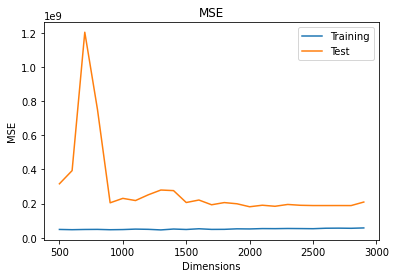

In [ ]:
import matplotlib.pyplot as plt

x=range(500,3000,100)
plt.plot(x,training_score,label="Training")
plt.plot(x,test_score,label="Test")
plt.legend()
plt.xlabel("Dimensions")
plt.ylabel("MSE")
plt.title("MSE");
plt.show()

In [ ]:
#find a better and faster regressor, 

In [ ]:
df_new

array([[-0.23158287, -0.10167819, -0.07500578, ...,  0.0128079 ,
         0.07528392,  0.03639363],
       [-0.22717076, -0.10553323, -0.06798842, ...,  0.03892316,
         0.12316488,  0.04805257],
       [-0.23064499, -0.10607802, -0.07361505, ..., -0.05786951,
         0.02802124,  0.04247735],
       ...,
       [-0.22724904, -0.10556124, -0.06812413, ..., -0.00615031,
        -0.00332646, -0.008236  ],
       [-0.26479227, -0.06922746, -0.12532358, ...,  0.09739135,
         0.22360621, -0.00653052],
       [-0.23075365, -0.10302637, -0.07223922, ..., -0.04261694,
         0.04791343, -0.02673801]])

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 153kB/s 


In [ ]:
x, x_val, y, y_val = train_test_split(df_new,Y_train,test_size=0.1,random_state=6)

In [ ]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

xgb_model1 = XGBRegressor(objective ='reg:linear',
                          learning_rate = 0.35,
                          max_depth = 8,
                          n_estimators = 15,
                          verbosity = 2)


xgb_model1.fit(df_new,Y_train)

[12:31:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:31:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=8
[12:31:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=8
[12:31:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=8
[12:31:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=8
[12:31:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=8
[12:31:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=8
[12:31:25] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.35, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=15,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=2)

In [ ]:
xgb_model2 = XGBRegressor(objective ='reg:squarederror',
                          learning_rate = 0.55,
                          max_depth = 11,
                          n_estimators = 30,
                          verbosity = 1)

xgb_model2.fit(df_new,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.55, max_delta_step=0,
             max_depth=11, min_child_weight=1, missing=None, n_estimators=30,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
from catboost import CatBoostRegressor
cb_model1 = CatBoostRegressor(iterations=500,
                             learning_rate=0.25,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 2,
                             verbose=25,
                             )

cb_model1.fit(df_new,Y_train)

0:	learn: 11458.9287889	total: 1.64s	remaining: 13m 36s
25:	learn: 9060.8047358	total: 42.7s	remaining: 12m 58s
50:	learn: 7733.6289733	total: 1m 23s	remaining: 12m 18s
75:	learn: 6545.0276649	total: 2m 5s	remaining: 11m 39s
100:	learn: 5669.7296546	total: 2m 47s	remaining: 11m
125:	learn: 5169.0339206	total: 3m 28s	remaining: 10m 19s
150:	learn: 4800.8085562	total: 4m 10s	remaining: 9m 38s
175:	learn: 4532.3159770	total: 4m 52s	remaining: 8m 58s
200:	learn: 4362.6566440	total: 5m 34s	remaining: 8m 17s
225:	learn: 4232.5236409	total: 6m 16s	remaining: 7m 36s
250:	learn: 4146.5407873	total: 6m 58s	remaining: 6m 54s
275:	learn: 4094.7024275	total: 7m 40s	remaining: 6m 13s
300:	learn: 4062.1520293	total: 8m 21s	remaining: 5m 31s


KeyboardInterrupt: ignored

In [ ]:
cb_model2 = CatBoostRegressor(iterations=500,
                             learning_rate=0.1,
                             depth=10,
                             random_seed = 3,
                             use_best_model=True,
                             verbose=25,                        
                             )

cb_model2.fit(x,y, eval_set=(x_val,y_val))

0:	learn: 11408.6214549	test: 12881.1716867	best: 12881.1716867 (0)	total: 747ms	remaining: 6m 12s
25:	learn: 10736.6609364	test: 12885.0726930	best: 12879.8697051 (13)	total: 18.7s	remaining: 5m 40s
50:	learn: 10383.1422416	test: 12915.5019144	best: 12879.8697051 (13)	total: 36.4s	remaining: 5m 20s
75:	learn: 10166.1277345	test: 12963.0019465	best: 12879.8697051 (13)	total: 53.4s	remaining: 4m 57s
100:	learn: 9957.0067453	test: 13059.5307008	best: 12879.8697051 (13)	total: 1m 11s	remaining: 4m 42s
125:	learn: 9606.5758261	test: 13151.9154898	best: 12879.8697051 (13)	total: 1m 30s	remaining: 4m 27s
150:	learn: 9284.0693760	test: 13231.5932799	best: 12879.8697051 (13)	total: 1m 48s	remaining: 4m 11s
175:	learn: 9044.0311169	test: 13300.1838235	best: 12879.8697051 (13)	total: 2m 7s	remaining: 3m 54s
200:	learn: 8873.9510829	test: 13363.5369311	best: 12879.8697051 (13)	total: 2m 25s	remaining: 3m 37s
225:	learn: 8703.4806447	test: 13406.9413915	best: 12879.8697051 (13)	total: 2m 44s	remai

In [ ]:
test_corpus = [' '.join([str(item) for item in [tokenizer.index_word.get(i) for i in x]]) for x in X_test]

In [ ]:
new_test = vectorizer.transform(test_corpus)
feature_names = vectorizer.get_feature_names()
dense = new_test.todense()
denselist = dense.tolist()
new_test = pd.DataFrame(denselist, columns=feature_names)
new_test

,',0,00,000,001,01,01me,02,03,04,05,06,07,07set,08,09,1,10,100,1000,100m,101,102,103,104,105,106,107,108,109,10k,10m,10s,10yrs,11,110,111,112,113,114,...,🚫,🤍,🤑,🤔,🤕,🤗,🤘,🤙,🤚,🤞,🤟,🤡,🤣,🤤,🤦,🤧,🤩,🤪,🤭,🤯,🤷,🤸,🥂,🥰,🥳,🥴,🥵,🥺,🦉,🦋,🧐,🧡,󠁢,󠁣,󠁧,󠁬,󠁳,󠁴,󠁷,󠁿
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3856,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
d_reduction = new_test.copy()
 
#Transform the data
df_test_new = pca.fit_transform(d_reduction)

In [ ]:
y_predxgb1=xgb_model1.predict(df_test_new)

ValueError: ignored

In [ ]:
y_predxgb2=xgb_model1.predict(new_test)

In [ ]:
y_predcb1 = cb_model1.predict(df_test_new)

In [ ]:
y_predcb2 = cb_model2.predict(new_test)

mean + 3*std ~= 200

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
print("Mean Absolute Error CB regressor model 1: " + str(np.sqrt(mean_absolute_error(y_predcb1, Y_test))))


Mean Absolute Error CB regressor model 1: 71.80896099431908


In [ ]:

for i in range(len(y_predcb1)):
  if y_predcb1[i] < 0:
    y_predcb1[i] = 0
  else:
    y_predcb1[i] = int(y_predcb1[i])

In [ ]:
a=pd.DataFrame(Y_test)
a.insert(1,"Test",np.array(y_predcb1),True)
a

,Likes,Test
3395,2875,11369.0
10193,3,21178.0
5640,25913,11443.0
16242,0,12812.0
12984,0,21679.0
...,...,...
16254,2,33355.0
8697,1980,55647.0
15033,20,10986.0
10105,2809,18488.0


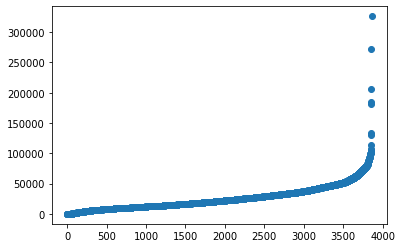

<Figure size 1080x1080 with 0 Axes>

In [ ]:

plt.scatter(range(0,3860),np.sort(np.abs(Y_test-y_predcb1)))
plt.figure(figsize=(15,15))
plt.show()


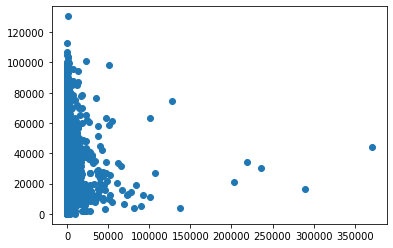

In [ ]:
plt.scatter(Y_test,y_predcb1)

In [ ]:
print(np.sum(np.abs(Y_test-y_predcb1)))

15937533.0


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,y_predcb1))

-0.09211311947468381


((Num of specific i-th word in the comment) / len(comment)

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
clf.fit(new_X, pd.DataFrame(Y_train))

In [ ]:
y_pred = clf.predict(new_test)

In [ ]:
sum = 0
y_pred=np.array(y_pred)
Y_test = np.array(Y_test)
for i in range(len(y_pred)):
  sum+=pow(y_pred[i]-Y_test[i],2)
sum/len(y_pred)

221957883.43212435